In [1]:

!pip install git+https://github.com/pycaret/pycaret.git@master --upgrade


  Cloning https://github.com/pycaret/pycaret.git (to revision master) to /tmp/pip-req-build-tv97wnhc
  Running command git clone --filter=blob:none --quiet https://github.com/pycaret/pycaret.git /tmp/pip-req-build-tv97wnhc
  Resolved https://github.com/pycaret/pycaret.git to commit 58ec3c282d58e94727f9d5b77b49f241e9103ab3
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [2]:
# Import and Load Dataset

from sklearn.datasets import load_wine
import pandas as pd

# Load built-in dataset (safe and always available)
data = load_wine(as_frame=True)
df = data.frame.drop(columns=['target'])  # remove target since clustering is unsupervised

print("✅ Dataset loaded successfully:", df.shape)
df.head()


✅ Dataset loaded successfully: (178, 13)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [3]:
# Setup Clustering Environment

from pycaret.clustering import *

exp_clu = setup(
    data=df,
    session_id=42,
    normalize=True,
    use_gpu=True,
    html=False
)


               Description                 Value
0               Session id                    42
1      Original data shape             (178, 13)
2   Transformed data shape             (178, 13)
3         Numeric features                    13
4               Preprocess                  True
5          Imputation type                simple
6       Numeric imputation                  mean
7   Categorical imputation                  mode
8                Normalize                  True
9         Normalize method                zscore
10                CPU Jobs                    -1
11                 Use GPU                  True
12          Log Experiment                 False
13         Experiment Name  cluster-default-name
14                     USI                  99fe


In [4]:
#Create and Compare Models

# Train a K-Means clustering model
kmeans = create_model('kmeans')

# Check available clustering algorithms
models()


   Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
0       0.248             55.082          1.7836            0           0   

   Completeness  
0             0  


,Name,Reference
ID,,
kmeans,K-Means Clustering,pycaret.internal.cuml_wrappers.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,pycaret.internal.cuml_wrappers.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch


In [5]:
# Assign Cluster Labels

clustered_df = assign_model(kmeans)
print("✅ Cluster labels assigned:", clustered_df['Cluster'].unique())
clustered_df.head()


✅ Cluster labels assigned: ['Cluster 2' 'Cluster 1' 'Cluster 0' 'Cluster 3']


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Cluster
0,14.23,1.71,2.43,15.600000,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,Cluster 2
1,13.20,1.78,2.14,11.200000,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,Cluster 2
2,13.16,2.36,2.67,18.600000,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,Cluster 2
3,14.37,1.95,2.50,16.799999,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,Cluster 2
4,13.24,2.59,2.87,21.000000,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,Cluster 2


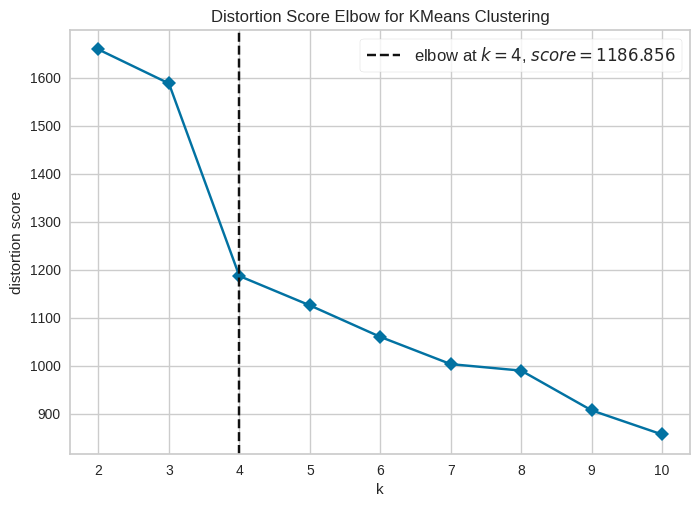

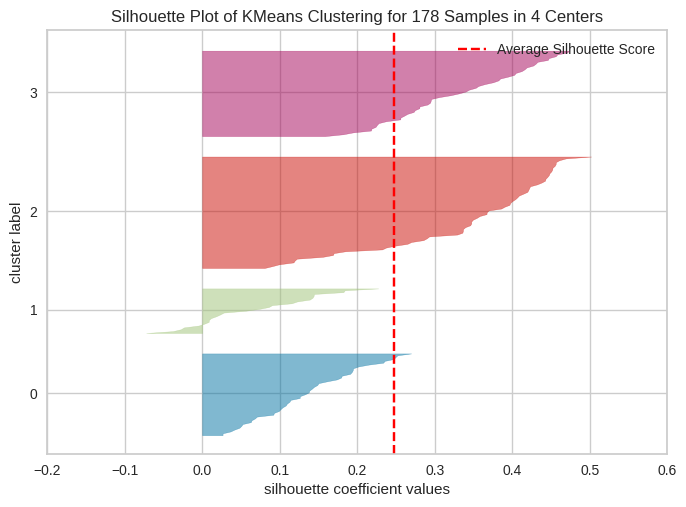

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [6]:
#  Analyze Model
# ==========================================
plot_model(kmeans, plot='elbow')
plot_model(kmeans, plot='silhouette')
plot_model(kmeans, plot='cluster')

# Interactive evaluation dashboard (optional)
evaluate_model(kmeans)


In [7]:
# Try MeanShift
# ==========================================
meanshift = create_model('meanshift')
assign_model(meanshift)
plot_model(meanshift, plot='cluster')


   Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
0      0.2245             6.4354          1.3201            0           0   

   Completeness  
0             0  


In [8]:
# Inspect Configuration

# Access PyCaret internal configs
get_config('X_train_transformed').head()

print("Current seed:", get_config('seed'))
set_config('seed', 123)
print("New seed:", get_config('seed'))


Current seed: 42
New seed: 123


In [9]:
# Save and Load Model
# ==========================================
save_model(kmeans, 'clustering_wine_kmeans')
loaded_model = load_model('clustering_wine_kmeans')

print("Model saved and reloaded successfully.")


Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Loaded
Model saved and reloaded successfully.


In [10]:
# Predict on test Data

new_data = df.sample(10, random_state=42)
preds = predict_model(loaded_model, data=new_data)
preds


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Cluster
19,13.64,3.10,2.56,15.2,116.0,2.70,3.03,0.17,1.66,5.10,0.96,3.36,845.0,Cluster 2
45,14.21,4.04,2.44,18.9,111.0,2.85,2.65,0.30,1.25,5.24,0.87,3.33,1080.0,Cluster 2
140,12.93,2.81,2.70,21.0,96.0,1.54,0.50,0.53,0.75,4.60,0.77,2.31,600.0,Cluster 3
30,13.73,1.50,2.70,22.5,101.0,3.00,3.25,0.29,2.38,5.70,1.19,2.71,1285.0,Cluster 2
67,12.37,1.17,1.92,19.6,78.0,2.11,2.00,0.27,1.04,4.68,1.12,3.48,510.0,Cluster 0
16,14.30,1.92,2.72,20.0,120.0,2.80,3.14,0.33,1.97,6.20,1.07,2.65,1280.0,Cluster 2
119,12.00,3.43,2.00,19.0,87.0,2.00,1.64,0.37,1.87,1.28,0.93,3.05,564.0,Cluster 0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,Cluster 3
109,11.61,1.35,2.70,20.0,94.0,2.74,2.92,0.29,2.49,2.65,0.96,3.26,680.0,Cluster 0
141,13.36,2.56,2.35,20.0,89.0,1.40,0.50,0.37,0.64,5.60,0.70,2.47,780.0,Cluster 3
